# NLTK Book - Chapter 2

[http://www.nltk.org/book/ch02.html](http://www.nltk.org/book/ch02.html)

The majority of the first part of this chapter is about the many different corpora of work that come with nltk for creating modals. I will do a quick summary and highlight the ways that these are worked with because they are different than what is done in the nltk.book corpus.

## Section 1

The different corpora looked at here are:
* Gutenberg Corpus (nltk.corpus.gutenberg)
  - These are older style books and can be used to train on literature.
* Web and Chat Text (nltk.corpus.webtext)
  - These are a collection of web conversations, many of which coming from the FireFox discussion forum, wine reviews, etc. They represent more conversational language and concepts like jargon.
* Brown Corpus (nltk.corpus.brown)
  - A collection of news and editorial documents and the data is categorized which is helpful if you are writing a classifier. The language comes from the 1960's so the language is a bit dated.
  - Introduced the idea of **stylistics** which is simply a term meaning categorizing information.
* Reuters Corpus (nltk.corpus.reuters)
  - This is another news corpus where the documents have been classified into 90 topics and split into training and test. This is different from brown because the categories overlap. There are over 10700 different files
* Inaugural Address Corpus (nltk.corpus.inaugural)
  - The inaugural addresses of every president up until the 2009 Obama speach. The year is always the first 4 digits of these texts, so you can easily get the year with `[fileid[:4] for fileid in inaugural.fileids()]`

These methods can be called on most corpora to get the data back in a more simple to parse way. However, the specific implementation and additional methods may be available depending upon this corpus. These are specifically defined in reference to the gutenberg corpus.
* `fileids()` is a method on a corpus that shows all of the file names
  - when a string is passed into reuters corpus, you are requesting fileids of the specific category
* `words(fileid)` is a method to return the text in word tokens - the book copora are actually documents tokenized with `words`.
* `raw(fileid)` a method to return the text, but not tokenized
* `sents(fileid)` a method to reutrn the text tokenized into sentences.
* `categories()` is a method on the brown corpus for fetching the different categories. Many of the above methods can use categories=categoryName as keys into their function in place of fileid's. Note that they can be either a single category as a string or a list of categories.

Here is a code sample that uses FreqDist and changes the delimiter for the print function:

In [1]:
import nltk
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals: 
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [2]:
editorials = brown.words(categories='editorial')
fdist = nltk.FreqDist(w.lower() for w in editorials)
questions = ['what', 'when', 'where', 'who', 'why']
for q in questions:
    print(q + ':', fdist[q], end=' ')

what: 113 when: 123 where: 45 who: 177 why: 23 

There is also an interesting frequency distribution known as ConditionalFreqDist which can be used like the following:

In [3]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance' ,'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


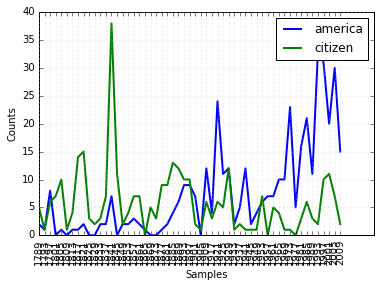

In [4]:
%matplotlib inline
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

cfd.plot()

There are also annotated text corpora which include linguistic annotations as well as corpora in other languages which each offer different challenges and training opportunities. Here is an example of one document translated into multiple languages: The "Universal Declaration of Human Rights"

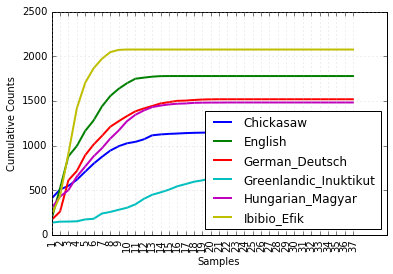

In [5]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

cfd.plot(cumulative=True)


As can be seen there are multiple types of corpora from categorized (gutenberg, webtext, udhr), overlapping categorized (reuters), isolated (brown), and temporal (inaugural) and they can all provide interesting natural language processing opportunities.

Here is a table of the common methods available on a corpus and what they do:

| Example                     | Description                                               |
|-----------------------------|-----------------------------------------------------------|
| `fileids()`                 | the files of the corpus                                   |
| `fileids([categories])`     | the files of the corpus corresponding to these categories |
| `categories()`              | the categories of the corpus                              |
| `categories([fileids])`     | the categories of the corpus corresponding to these files |
| `raw()`                     | the raw content of the corpus                             |
| `raw(fileids=[f1,f2,f3])`   | the raw content of the specified files                    |
| `raw(categories=[c1,c2])`   | the raw content of the specified categories               |
| `words()`                   | the words of the whole corpus                             |
| `words(fileids=[f1,f2,f3])` | the words of the specified fileids                        |
| `words(categories=[c1,c2])` | the words of the specified categories                     |
| `sents()`                   | the sentences of the whole corpus                         |
| `sents(fileids=[f1,f2,f3])` | the sentences of the specified fileids                    |
| `sents(categories=[c1,c2])` | the sentences of the specified categories                 |
| `abspath(fileid)`           | the location of the given file on disk                    |
| `encoding(fileid)`          | the encoding of the file (if known)                       |
| `open(fileid)`              | open a stream for reading the given corpus file           |
| `root`                      | if the path to the root of locally installed corpus       |
| `readme()`                  | the contents of the README file of the corpus             |

You can also load your own text into a corpus reader like the above by using the `PlaintextCorpusReader` here is an example that access the dict files in linux:

In [6]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/usr/share/dict'
wordlist = PlaintextCorpusReader(corpus_root, '.*')
wordlist.fileids()

OSError: No such file or directory: 'C:\\usr\\share\\dict'

In [ ]:
wordlist.words('american-english')

We also have access the the `BracketParseCorpusReader` which will parse several documents matching a file pattern.

# Conditional Frequency Distributions

When a corpa is segmented, we can maintain that segmentation using conditional frequency distributions. Here we are going to disect this code sample that was used without explanation earlier:

In [7]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
)

To begin with, we create tuples of genre and word pairs, this is done by looping over every genre in the list `['news', 'romance']` and then list through all of the words within the corpus that matches that genre. Here is a sample that is just that:

In [8]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]
len(genre_word)

170576

You can see that this list puts the news corpa first and the romance second

In [9]:
print(genre_word[:4])
print(genre_word[-4:])

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]
[('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]


When this list is used as a the parameters to `ConditionalFreqDist` it generates an object with two lists that you can see by just printing the variable to which we stored the result

In [10]:
print(cfd)

<ConditionalFreqDist with 2 conditions>


In [11]:
cfd.conditions()

['news', 'romance']

You can access each frequency distribution

In [12]:
print(cfd['news'])
print(cfd['romance'])

<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>


In [13]:
cfd['news'].most_common(20)

[('the', 5580),
 (',', 5188),
 ('.', 4030),
 ('of', 2849),
 ('and', 2146),
 ('to', 2116),
 ('a', 1993),
 ('in', 1893),
 ('for', 943),
 ('The', 806),
 ('that', 802),
 ('is', 732),
 ('``', 732),
 ('was', 717),
 ("''", 702),
 ('on', 657),
 ('at', 598),
 ('with', 545),
 ('be', 526),
 ('by', 497)]

In [14]:
cfd['news']['will']

389

So what is the value of having the two frequency distributions bundled in this way? There are some useful methods for tabulation and plotting. Previously in this chapter we plotted two graphs with comparison information. Here they are again:

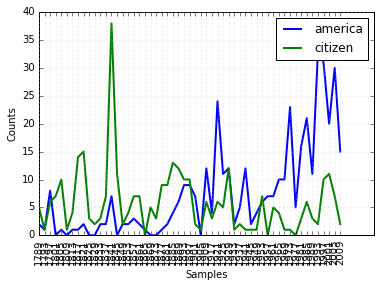

In [15]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

cfd.plot()

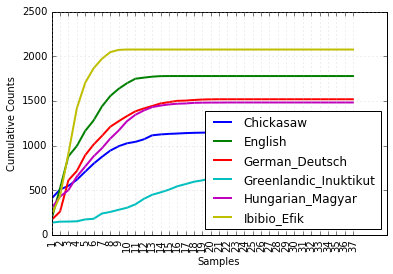

In [16]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

cfd.plot(cumulative=True)

In the `plot()` and `tabulate()` methods we can optionally choose which conditions to show with the `conditions=` parameter. We can also limit it to show only samples with the `samples=` parameter. This gives greater control, not only of the data that is shown, but also the order in which they are shown. Here is an example that limits the language distibution to just two languages and to just words greater than 10 characters long

In [17]:
cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(1,10), cumulative=True)

                  1    2    3    4    5    6    7    8    9 
       English  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch  171  263  614  717  894 1013 1110 1213 1275 


Below we chart the conditional frequency of the days of the week to compare news and romance

In [18]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


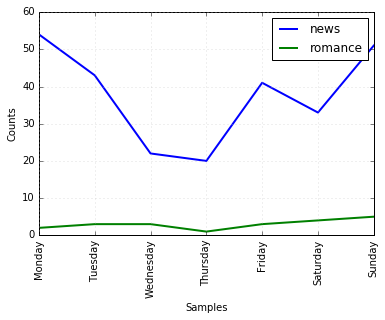

In [19]:
cfd.tabulate(samples=days)
cfd.plot(samples=days)

We can use conditional frequency distibutions to create a table of bigrams, recall this from earlier:

In [20]:
from nltk import bigrams
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

Can we use bigrams and frequency distibutions to generate sentences? It seems likely because we can get the most likely word to follow the current one. Lets try it

In [21]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [22]:
cfd['living']

FreqDist({',': 1,
          '.': 1,
          'creature': 7,
          'soul': 1,
          'substance': 2,
          'thing': 4})

In [23]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

Well, it created a sentence, but it looks like it is prone to get into loops once we hit common word combinations. This is still interesting. Here is a list of the commonly used conditional frequency distribution methods and idioms:

| Example                                | Description                                                          |
|----------------------------------------|----------------------------------------------------------------------|
| `cfdist = ConditionalFreqDist(pairs)`  | create a conditional frequency distribution from a list of pairs     |
| `cfdist.conditions()`                  | the conditions                                                       |
| `cfdist[condition]`                    | the frequency distribution for this condition                        |
| `cfdist[condition][sample]`            | frequency for the given sample for this condition                    |
| `cfdist.tabulate()`                    | tabulate the conditional frequency distribution                      |
| `cfdist.tabulate(samples, conditions)` | tabulation limited to the specified samples and conditions           |
| `cfdist.plot()`                        | graphical plot of the conditional frequency distribution             |
| `cfdist.plot(samples, conditions)`     | graphical plot limited to the specified samples and conditions       |
| `cfdist1 < cfdist2`                    | test if samples in `cfdist1` occur less frequently than in `cfdist2` |

# Python: Code Reuse

This section is all about using functions and puting python into files so you can execute the file repeatedly. It has you create some very basic scripts and store them in a file named monty.py and then execute them using 
`python monty.py` or via the interpreter with `from monty import *` which does the same thing - executes all of the code in the file.

Python files, like functions and variables, are typically named in snake case.

The book goes over function definitions that look something like this:
```
def func_name (parameters):
    local_var = ' '.split(parmeters)
```

It also discusses *local scope*, the *return* keyword and function invocation. Here is a function that they define to dicuss the different parts - I added it to the text_proc.py file:

In [24]:
def plural (word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [25]:
print(plural('fairy'))
print(plural('woman'))
print(plural('fish'))
print(plural('box'))

fairies
women
fishes
boxes


They then talk about how a method is a function that exists on a thing, but they do not go deeper into anything object oriented. The book suggests putting commonly used methods into a file so that you can reuse them by simply importing your file. It does, however, discuss what a module and package are.

# Lexical Resources

There are several key words discussed in this section:
* lexicon - a collection of words or phrases as well as information about them
* lexical entry - a single value in a lexicon including a word and may include things like definition, part of speech/lexical category etc.
* headword - the word that is being described in the lexical entry
* lemma - another word for headword
* homonyms - distinct words with the same spelling but different definitions ("saw" for example)

NLTK comes with a few corpa that are just simple lexicon's - sorted wordlists. An example is `nltk.corpus.words.words()` will return a list of words in english. This is a method that goes through a document and prints all words that are not part of the normal english language - it has been added to text_proc.py:

In [26]:
def unusual_word (text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [27]:
odd_austen = unusual_word(nltk.corpus.gutenberg.words('austen-sense.txt'))
print(len(odd_austen))
print(odd_austen[:15])

1601
['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches']


Note that in order to use nltk in the file I imported, I had to import it in the file too. Simply calling a function in a context where nltk is loaded does not appear to add it to the context where the function is running.

Another useful corpa in nltk is the *stopwords* corpa which contain many words that are not typically useful when processing a document. These include words like "me", "a", "what" and "the".  The stopword list is categorized by language, so to use them we have to do something like

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him']

The book then creates a function for finding the fraction of words in a text that are not in the stopword list, here it is:

In [29]:
def content_fraction (text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

In [30]:
content_fraction(nltk.corpus.reuters.words())

0.735240435097661

we can use the above techniques to solve word puzzles, so for example given a cube that looks like this:

<table>
    <tbody>
        <tr>
            <td>E</td>
            <td>G</td>
            <td>I</td>
        </tr>
        <tr>
            <td>V</td>
            <td>R</td>
            <td>V</td>
        </tr>
        <tr>
            <td>O</td>
            <td>N</td>
            <td>L</td>
        </tr>
    </tbody>
</table>

We can write a script to find all of the words that can be built that include the center letter like so

In [31]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
sorted([w for w in wordlist if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters])

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

Another interesting corpus is the names corpus which includes 8000 first names categorized by gender, here is a way to find names that are in both lists

In [32]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

In [33]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')

[w for w in male_names if w in female_names][:15]

['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie']

Lets plot the what the last letter of a name means about the gender of that name

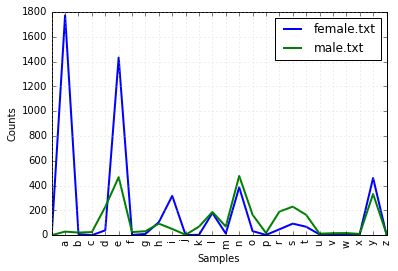

In [34]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid)
)
cfd.plot()

Another dictionary that comes with the nltk corpa is the `cmudict` which includes the words, as well as there pronunciations. This was originally intended for speech synthesizers. Each of the distinct labels for a distinct sound is called a *phone*.

In [35]:
entries = nltk.corpus.cmudict.entries()
len(entries)
for entry in entries[42371:42379]:
    print(entry)
    

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


Note that many words have multiple pronunciations, apparently fire can be pronounced in one syllable or two. Below is a more complex example of a python for loop. It loops through the entries and finds all of the words that have three phones and start with P and end with T.

In [36]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
            print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

Here is another example which goes through the copra and finds all the words that end with the sounds for "nicks" which can be used for rhyming.

In [38]:
syllable = ['N', 'IH0', 'K', 'S']
rhymes = [w for w, p in entries if p[-4:] == syllable]
print(len(rhymes))
print(rhymes[10:25])

83
['conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics']


In [39]:
[w for w, p in entries if p[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

The above lists all of the words that end in the M sound, but actually end with an "n"

In [40]:
sorted(set(w[:2] for w, p in entries if p[0] == 'N' and w[0] != 'n'))

['gn', 'kn', 'mn', 'pn']

The above lists all fo the starting word combinations that start with the "N" sound, but do not start with the letter "n"

In [44]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]

first = [w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]
second = [w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']]

print(len(first))
print(first[125:135])

print(len(second))
print(second[245:255])

589
['congratulated', 'congratulating', 'conservatism', 'conservatories', 'consolidated', "consolidated's", 'consolidating', 'consolidator', 'consolidators', 'constabulary']
386
['inoculation', 'inoculations', 'insemination', 'insinuation', 'insinuations', 'instantiation', 'interpretation', 'interpretations', 'interrogation', 'interrogations']


The above method finds the specific stress patterns used in words. It uses some rather sophisticated nested list comprehensions to get it done too.

In [45]:
p3 = [(pron[0] + '-' + pron[2], word)
     for (word, pron) in entries
     if pron[0] == 'P' and len(pron) == 3]
cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
    if len(cfd[template]) > 10:
        words = sorted(cfd[template])
        wordstring = ' '.join(words)
        print(template, wordstring[:70] + '...')

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


In the above we find "minimally-contrasting" sets of p-words consisting of 3 sounds and grouping them by their last sound.

In [46]:
prondict = nltk.corpus.cmudict.dict()
prondict['fire']

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]

In [47]:
prondict['blog']

KeyError: 'blog'

In [49]:
prondict['blog'] = [['B', 'L', 'AA1', 'G']]
prondict['blog']

[['B', 'L', 'AA1', 'G']]

Above we looked at the dictionary of the pronunciation corpa, it allows you to look up pronunciations of words. If it is not in the dictionary, you get a "KeyError" and you can actually add to it for a session. This can be used to take a sentence and structure a kind of text-to-speech sentence like so

In [52]:
text = ['we', 'all', 'love', 'natural', 'language', 'processing']
speech = [ph for w in text for ph in prondict[w][0]]
print(speech)

['W', 'IY1', 'AO1', 'L', 'L', 'AH1', 'V', 'N', 'AE1', 'CH', 'ER0', 'AH0', 'L', 'L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH', 'P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']
